### Three common tasks in data wrangling process:

- Data cleaning

- Data transformation

- Data enrichment

### Data cleaning:

- Renaming
- Sorting and reordering
- Data type conversions
- Deduplicating data
- Addressing missing or invalid data
- Filtering to the desired subset of data

In [ ]:
# Most data we will find is either in a wide format or a long format.
# The wide format is preferred for analysis and database design, while the long format is considered poor design because each column should be its own data type and have singular meaning

## Wide format

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
wide_df = pd.read_csv('wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv('long_data.csv', usecols=['date', 'datatype', 'value'], parse_dates=['date'])[['date', 'datatype', 'value']] # sort columns

In [4]:
# With wide format data, we represent measurements of variables with their own columns, and each row represents an observation of those variables
# This makes it easy to compare variables across observations, get summary statistics, perform operations, and present our data.
# Some visualizations don't work with this data format because they may rely on the long format to split, size and/or color the plot content

wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [5]:
wide_df.describe(include='all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
unique,31,NaN,NaN,NaN
top,2018-10-01 00:00:00,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
first,2018-10-01 00:00:00,NaN,NaN,NaN
last,2018-10-31 00:00:00,NaN,NaN,NaN
mean,NaN,16.829032,7.561290,10.022581
std,NaN,5.714962,6.513252,6.596550
min,NaN,7.800000,-1.100000,-1.100000
25%,NaN,12.750000,2.500000,5.550000


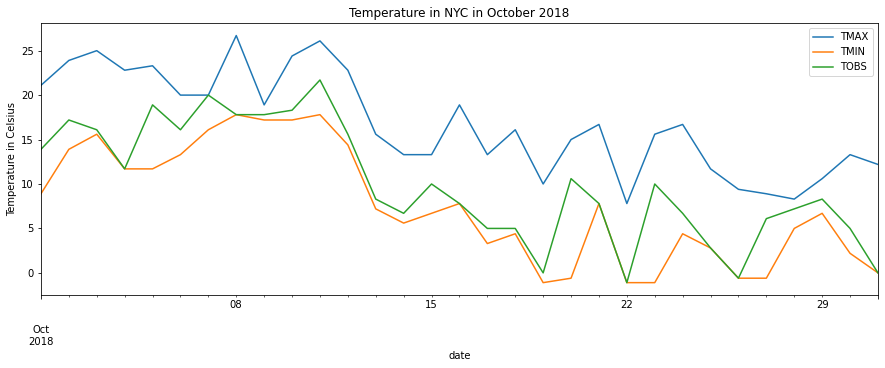

In [6]:
wide_df.plot(kind='line', y=['TMAX', 'TMIN', 'TOBS'], x='date', title='Temperature in NYC in October 2018', figsize=(15, 5)).set_ylabel('Temperature in Celsius')
plt.show()

## Long format

In [7]:
# Long format data has a row for each observation of a variable
# If we have three variables being measured daily, we have three rows for each day we record observations
# Long format setup can be achieved by turning the variable column names into a column where the data is the variable name and putting their values in a separate values column

In [9]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


In [10]:
long_df.describe(include='all')
# value column shows summary statistics by summarizing daily max, min and temperatures at time of observation
# it means this summary data is useless

,date,datatype,value
count,93,93,93.000000
unique,31,3,NaN
top,2018-10-01 00:00:00,TMAX,NaN
freq,3,31,NaN
first,2018-10-01 00:00:00,NaN,NaN
last,2018-10-31 00:00:00,NaN,NaN
mean,NaN,NaN,11.470968
std,NaN,NaN,7.362354
min,NaN,NaN,-1.100000
25%,NaN,NaN,6.700000


In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)}, style='white')

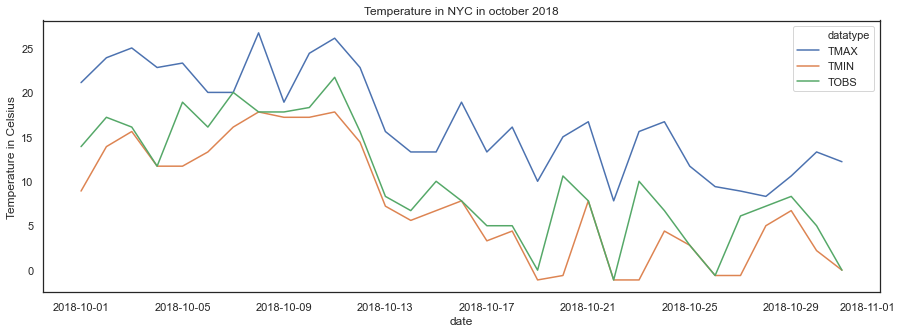

In [13]:
ax=sns.lineplot(data=long_df, hue='datatype', y='value', x='date')
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in october 2018')
plt.show()

# seaborn is able to subset based on the datatype column to give individual lines for the daily max, min and observed temperature

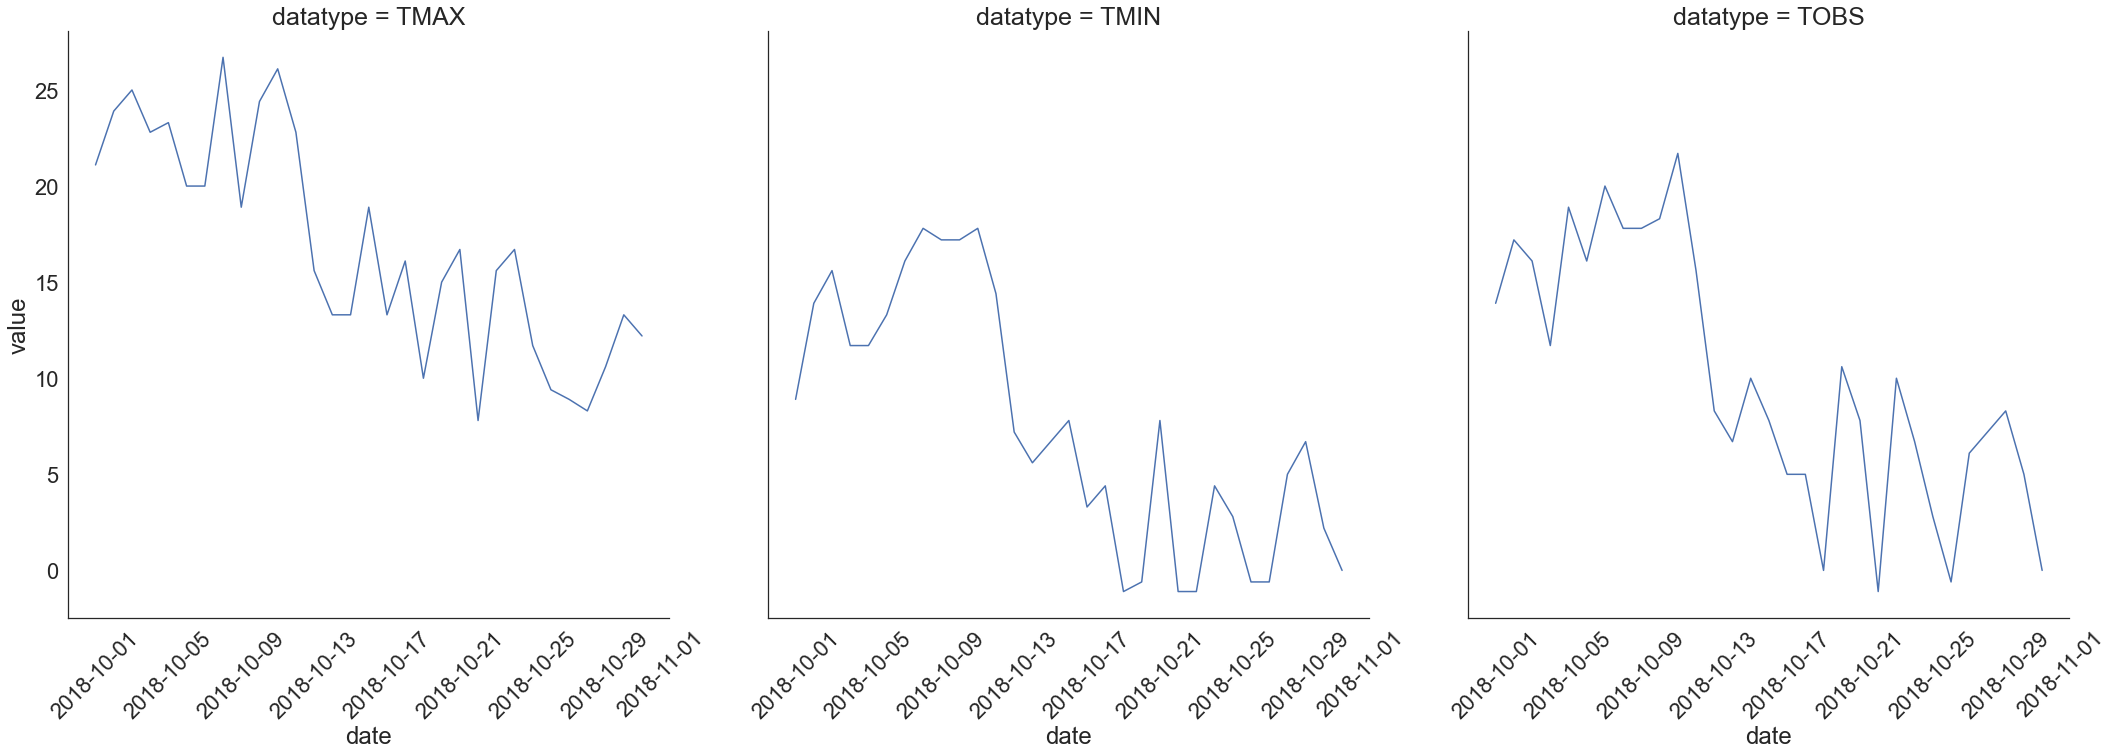

In [15]:
sns.set(rc={'figure.figsize':(20, 10)}, style='white', font_scale=2)
g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

## Data enrichment

- Adding new columns
- Binning 
- Aggregating
- Resampling

### Collecting temperature data

In [16]:
import requests

def make_request(endpoint, payload=None):
  """
  Make a request to a specific endpoint on the weather API passing headers and optional payload
  Parameters:
  - endpoint: The endpoint of the API you want to make a GET request to
  - payload: A dictionary of data to pass along with the request
  """

  return requests.get(f'https://www.ncdc.noaa.gov/cdo-web/api/v2/{endpoint}', headers={'token': 'iQqNZjROusRBHzivgUvLQHxLoHmDqfDM'}, params=payload)

In [17]:
response = make_request('datasets')
response.status_code

200

In [18]:
response.json().keys()

dict_keys(['metadata', 'results'])

In [19]:
response.json()['metadata']

{'resultset': {'offset': 1, 'count': 11, 'limit': 25}}

In [20]:
response.json()['results'][0].keys()

dict_keys(['uid', 'mindate', 'maxdate', 'name', 'datacoverage', 'id'])

In [21]:
# Looking at IDs and names of the datasets using list comprehension
[(data['id'], data['name']) for data in response.json()['results']]

[('GHCND', 'Daily Summaries'),
 ('GSOM', 'Global Summary of the Month'),
 ('GSOY', 'Global Summary of the Year'),
 ('NEXRAD2', 'Weather Radar (Level II)'),
 ('NEXRAD3', 'Weather Radar (Level III)'),
 ('NORMAL_ANN', 'Normals Annual/Seasonal'),
 ('NORMAL_DLY', 'Normals Daily'),
 ('NORMAL_HLY', 'Normals Hourly'),
 ('NORMAL_MLY', 'Normals Monthly'),
 ('PRECIP_15', 'Precipitation 15 Minute'),
 ('PRECIP_HLY', 'Precipitation Hourly')]

In [22]:
response = make_request('datacategories', payload={'datasetid':'GHCND'})
response.status_code

200

In [23]:
response.json()

{'metadata': {'resultset': {'offset': 1, 'count': 9, 'limit': 25}},
 'results': [{'name': 'Evaporation', 'id': 'EVAP'},
  {'name': 'Land', 'id': 'LAND'},
  {'name': 'Precipitation', 'id': 'PRCP'},
  {'name': 'Sky cover & clouds', 'id': 'SKY'},
  {'name': 'Sunshine', 'id': 'SUN'},
  {'name': 'Air Temperature', 'id': 'TEMP'},
  {'name': 'Water', 'id': 'WATER'},
  {'name': 'Wind', 'id': 'WIND'},
  {'name': 'Weather Type', 'id': 'WXTYPE'}]}

In [25]:
response = make_request('datatypes', payload={'datacategoryid':'TEMP', 'limit': 100})
response.status_code

200

In [26]:
[(data['id'], data['name']) for data in response.json()['results']]

[('CDSD', 'Cooling Degree Days Season to Date'),
 ('DATN',
  'Number of days included in the multiday minimum temperature (MDTN)'),
 ('DATX',
  'Number of days included in the multiday maximum temperature (MDTX)'),
 ('DLY-DUTR-NORMAL', 'Long-term averages of daily diurnal temperature range'),
 ('DLY-DUTR-STDDEV',
  'Long-term standard deviations of daily diurnal temperature range'),
 ('DLY-TAVG-NORMAL', 'Long-term averages of daily average temperature'),
 ('DLY-TAVG-STDDEV',
  'Long-term standard deviations of daily average temperature'),
 ('DLY-TMAX-NORMAL', 'Long-term averages of daily maximum temperature'),
 ('DLY-TMAX-STDDEV',
  'Long-term standard deviations of daily maximum temperature'),
 ('DLY-TMIN-NORMAL', 'Long-term averages of daily minimum temperature'),
 ('DLY-TMIN-STDDEV',
  'Long-term standard deviations of daily minimum temperature'),
 ('EMNT', 'Extreme minimum temperature for the period.'),
 ('EMXT', 'Extreme maximum temperature for the period.'),
 ('HDSD', 'Heating De

In [27]:
response = make_request('locationcategories', {'datasetid': 'GHCND'})
response.status_code

200

In [28]:
import pprint
pprint.pprint(response.json())

{'metadata': {'resultset': {'count': 12, 'limit': 25, 'offset': 1}},
 'results': [{'id': 'CITY', 'name': 'City'},
             {'id': 'CLIM_DIV', 'name': 'Climate Division'},
             {'id': 'CLIM_REG', 'name': 'Climate Region'},
             {'id': 'CNTRY', 'name': 'Country'},
             {'id': 'CNTY', 'name': 'County'},
             {'id': 'HYD_ACC', 'name': 'Hydrologic Accounting Unit'},
             {'id': 'HYD_CAT', 'name': 'Hydrologic Cataloging Unit'},
             {'id': 'HYD_REG', 'name': 'Hydrologic Region'},
             {'id': 'HYD_SUB', 'name': 'Hydrologic Subregion'},
             {'id': 'ST', 'name': 'State'},
             {'id': 'US_TERR', 'name': 'US Territory'},
             {'id': 'ZIP', 'name': 'Zip Code'}]}


In [40]:
# Searching for Zagreb in dataset using binary search 

def get_item(name, what, endpoint, start=1, end=None):
  """
  Grab the JSON payload for a given item using binary search
  Parameters:
  - name: The item to look for
  - what: Dictionary specifying what the item in name is
  - endpoint: Where to look for the item
  - start: The position to start at.
  - end: The last position of the cities. Used to find the midpoint

  Returns: Dictionary of the information for the item if found, otherwise an empty dictionary
  """

  # find the midpoint which we use to cut the data in half each time
  mid = (start + (end if end else 1)) // 2

  # lowercase the name so this is not case-sensitive
  name = name.lower()

  # define the payload we will send with each request
  payload = {
    'datasetid': 'GHCND', 'sortfield': 'name', 'offset': mid, # we will change the offset each time
    'limit': 1 # we only want one value back
  }

  # make request adding additional filter parameters from 'what'
  response = make_request(endpoint, {**payload, **what})

  if response.ok:
    payload = response.json()
    # if response ok, grab the end index from the response
    end = end if end else response.json()['metadata']['resultset']['count']

    # grab the lowercase version of the current name
    current_name = payload['results'][0]['name'].lower()

    # if what we are searching for is in the current name, we have found our item
    if name in current_name:
      # return the found item
      return payload['results'][0]
    else:
      if start >= end:
        # if our start index is greater than or equal to our end index, we couldn't find it
        return {}
      elif name < current_name:
        # our name comes before the current name in the alphabet, so we search further to the left
        return get_item(name, what, endpoint, start, mid - 1)
      elif name > current_name:
        # our name comes after the current name in the alphabet, so we search further to the right
        return get_item(name, what, endpoint, mid + 1, end)
  else:
    # response wasn't ok, use code to determine why
    print(f'Response not OK, status: {response.status_code}')

In [30]:
def get_location(name):
  """
  Grab the JSON payload for a given location using binary search
  Parameters:
  - name: The city to look for
  Returns: dictionary of the information for the city if found, otherwise an empty dictionary
  """

  return get_item(name, {'locationcategorid': 'CITY'}, 'locations')

In [41]:
zagreb = get_location('Zagreb')
zagreb

{'mindate': '1860-12-30',
 'maxdate': '2022-01-30',
 'name': 'Zagreb, HR',
 'datacoverage': 0.9933,
 'id': 'CITY:HR000002'}

In [42]:
nyc = get_location('New York')
nyc

{'mindate': '1970-05-01',
 'maxdate': '1989-10-01',
 'name': 'New York Mills, NY 13417',
 'datacoverage': 0.9181,
 'id': 'ZIP:13417'}

In [49]:
nyc

{'mindate': '1970-05-01',
 'maxdate': '1989-10-01',
 'name': 'New York Mills, NY 13417',
 'datacoverage': 0.9181,
 'id': 'ZIP:13417'}

In [56]:
# drilling down to the stationid
zagreb_city = get_item('Zagreb', {'locationid': zagreb['id']}, 'stations')
zagreb_city

{'elevation': 157,
 'mindate': '1860-12-30',
 'maxdate': '2022-01-30',
 'latitude': 45.8167,
 'name': 'ZAGREB GRIC, HR',
 'datacoverage': 0.9893,
 'id': 'GHCND:HR000142360',
 'elevationUnit': 'METERS',
 'longitude': 15.9781}

In [57]:
response = make_request('data', 
    {
      'datasetid': 'GHCND',
      'stationid': zagreb_city['id'],
      'locationid': zagreb['id'],
      'startdate': '2018-10-01',
      'enddate': '2018-10-31',
      'datatypeid': ['TOBS', 'TMIN', 'TMAX'],
      'units': 'metric',
      'limit': 100
    })
response.status_code

200

In [1]:
df = pd.DataFrame(response.json()['results'])
df.head()

NameError: name 'response' is not defined

## Cleaning data

In [2]:
import pandas as pd
df = pd.read_csv('nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


### Rename columns

In [3]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [4]:
df.rename(columns={'value': 'temp_C', 'attributes': 'flags'}, inplace=True)

In [5]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

In [6]:
# Changing column names to uppercase
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

### Type conversion

In [7]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [8]:
# changing date to datetime
df.loc[:, 'date'] = pd.to_datetime(df.date)
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [9]:
df.date.describe()

count                      93
unique                     31
top       2018-10-01 00:00:00
freq                        3
first     2018-10-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [10]:
# When working with DatetimeIndex or PeriodIndex, if we need to keep track of time zones, we can use tz_localize() methods to tie our datetimes to a time zone
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq='D')

In [11]:
eastern = pd.read_csv('nyc_temperatures.csv', index_col='date', parse_dates=True).tz_localize('EST')
eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [12]:
# Change time zone to a different one
eastern.tz_convert('UTC').head()

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [13]:
# Truncate datetimes with to_period()
eastern.to_period('M').index

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

In [14]:
eastern.to_period('M').to_timestamp().index

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

In [15]:
# Using assign() to handle this conversion
df = pd.read_csv('nyc_temperatures.csv').rename(columns={'value': 'temp_C', 'attributes': 'flags'})

In [16]:
new_df = df.assign(date=pd.to_datetime(df.date), temp_F=(df.temp_C * 9 / 5) + 32)
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

In [17]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


In [19]:
# We can also use lambda function to change celsius to fahrenheit
new_df = df.assign(date=pd.to_datetime(df.date), temp_F=lambda x: (x.temp_C * 9 / 5) + 32)
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


In [20]:
# We can use astype() method to convert one column at a time
df = df.assign(date=pd.to_datetime(df.date), temp_C_whole=df.temp_C.astype('int'), temp_F=(df.temp_C * 9 / 5) + 32, temp_F_whole=lambda x: x.temp_F.astype('int'))
df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [21]:
# Using category for station and datetype columns
df_with_categories = df.assign(station=df.station.astype('category'), datatype=df.datatype.astype('category'))
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int32
temp_F                 float64
temp_F_whole             int32
dtype: object

In [22]:
df_with_categories.describe(include='category')

,datatype,station
count,93,93
unique,3,1
top,TMIN,GHCND:USW00014732
freq,31,93


In [23]:
# We can order categories
pd.Categorical(['med', 'med', 'low', 'high'], categories=['low', 'med', 'high'], ordered=True)

[med, med, low, high]
Categories (3, object): [low < med < high]

### Reordering, reindexing, and sorting data

In [24]:
# Check hottest days in NYC during october 2018
df.sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74


In [25]:
# We can check for NaN values with na_position='first' argument
df.sort_values(by='temp_C', ascending=False, na_position='first').head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [26]:
# Sorting with multiple columns
df.sort_values(by=['temp_C', 'date'], ascending=False).head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [27]:
# Using nlargest() to grab the n rows with the largest values according to a specific criteria 
df.nlargest(n=5, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [28]:
# Using sort_index() 
df.sample(5, random_state=0).sort_index().index

Int64Index([2, 13, 16, 30, 55], dtype='int64')

In [29]:
# Sorting columns alphabetically using axis=1
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


In [30]:
# Using sort_index to test equality between dataframes
df.equals(df.sort_values(by='temp_C'))

False

In [31]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

In [32]:
# When we drop rows, filter or do anything that returns only some of the rows, our index will have some holes in it. 
# We can reset it with reset_index() method
df[df.datatype == 'TAVG'].head().reset_index()

,index,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2,6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
3,9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
4,12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


In [33]:
# Setting a different index with set_index() method
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [35]:
# Setting datetime as index, we can select range of data
df['2018-10']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
...,...,...,...,...,...,...,...
2018-10-30,TMAX,GHCND:USW00014732,",,W,2400",13.9,13,57.02,57
2018-10-30,TMIN,GHCND:USW00014732,",,W,2400",7.2,7,44.96,44
2018-10-31,TAVG,GHCND:USW00014732,"H,,S,",12.6,12,54.68,54


In [36]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [39]:
# Using reindex() method to align it with certain values
sp = pd.read_csv('sp500.csv', index_col='date', parse_dates=True).drop(columns=['adj_close'])

In [41]:
sp.head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


In [42]:
# If we were analyzin the performance of a group of assets in a portfolio that included S&P 500 and something that trades on weekend, like bitcoin, we would need to have values for every day
bitcoin = pd.read_csv('bitcoin.csv', index_col='date', parse_dates=True).drop(columns=['market_cap'])

In [43]:
# Aggregate the data by day for the portfolio

# every day's closing price = S&P500 close + Bitcoin close
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(pd.Grouper(freq='D')).sum()
portfolio.head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


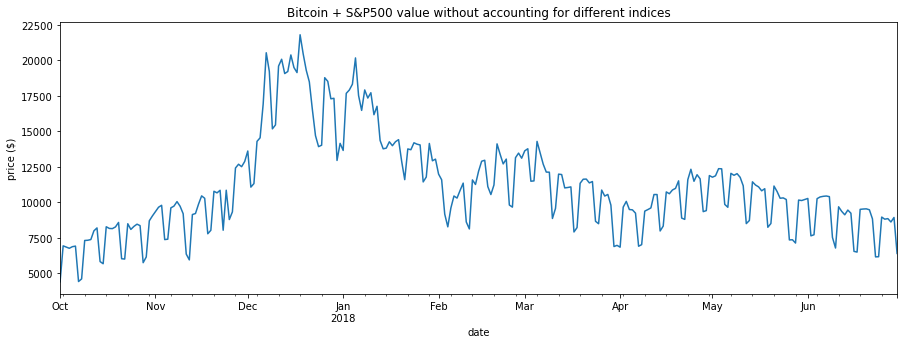

In [44]:
import matplotlib.pyplot as plt

portfolio['2017-Q4':'2018-Q2'].plot(y='close', figsize=(15, 5), legend=False, title='Bitcoin + S&P500 value without accounting for different indices')
plt.ylabel('price ($)')
plt.show()

# the plot is dropping every weekend because there are only bitcoin values for those days

In [45]:
# If we want to fill missing data, we can reindex S&P500 data using bitcoin's index with reindex() method
# Using 'ffill' - brings values forward, 'bfill' - back propagates the values, 'nearest' - fills according to the rows closest to the missing ones

sp.reindex(bitcoin.index, method='ffill').head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [46]:
# Solving NaN values with np.where() condition and assign() method
import numpy as np 

In [47]:
sp_reindexed = sp.reindex(bitcoin.index).assign(
  # put 0 when market is closed
  volume=lambda x: x.volume.fillna(0),
  close=lambda x: x.close.fillna(method='ffill'),
  # take the closing price if these aren't available
  open=lambda x: np.where(x.open.isnull(), x.close, x.open),
  high=lambda x: np.where(x.high.isnull(), x.close, x.high),
  low=lambda x: np.where(x.low.isnull(), x.close, x.low)
)

In [48]:
sp_reindexed.head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


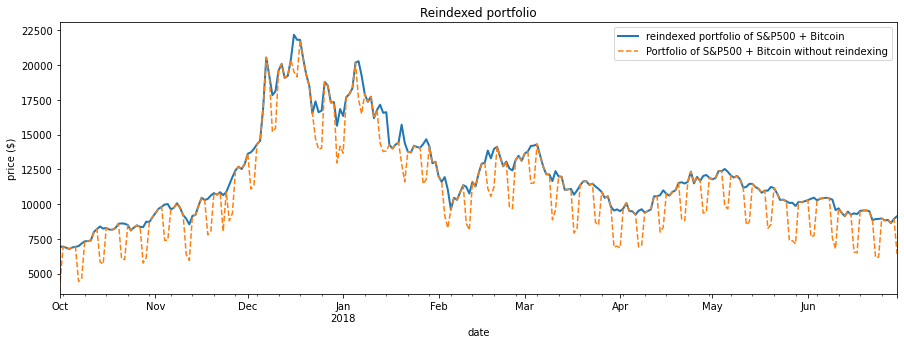

In [49]:
# Recreating portfolio with the reindexed S&P500 data and use a visualisation to compare it with the previous attempt

fixed_portfolio = pd.concat([sp_reindexed, bitcoin], sort=False).groupby(pd.Grouper(freq='D')).sum()

ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(y='close', label='reindexed portfolio of S&P500 + Bitcoin', figsize=(15, 5), linewidth=2, title='Reindexed portfolio')
# add line for original portfolio for comparison
portfolio['2017-Q4':'2018-Q2'].plot(y='close', ax=ax, linestyle='--', label='Portfolio of S&P500 + Bitcoin without reindexing').set_ylabel('price ($)')
plt.show()

## Restructuring data

In [51]:
long_df = pd.read_csv('long_data.csv', usecols=['date', 'datatype', 'value']).rename(columns={'value': 'temp_C'}) \
                        .assign(date=lambda x: pd.to_datetime(x.date), temp_F=lambda x: (x.temp_C * 9 / 5 ) + 32)

In [52]:
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [53]:
long_df.head().T

,0,1,2,3,4
datatype,TMAX,TMIN,TOBS,TMAX,TMIN
date,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-02 00:00:00
temp_C,21.1,8.9,13.9,23.9,13.9
temp_F,69.98,48.02,57.02,75.02,57.02


### Pivoting dataframes

In [54]:
# We pivot our data to go from long format to wide format
# In order to pivot data, we need to tell which column currently holds the values and the column that contains what will become the column names in the wide format

pivoted_df = long_df.pivot(index='date', columns='datatype', values='temp_C')
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [55]:
pivoted_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


In [56]:
# We can provide multiple columns to use as the values
pivoted_df = long_df.pivot(index='date', columns='datatype', values=['temp_C', 'temp_F'])
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [57]:
# If we want to select TMIN in Fahrenheit 
pivoted_df['temp_F']['TMIN'].head()

date
2018-10-01    48.02
2018-10-02    57.02
2018-10-03    60.08
2018-10-04    53.06
2018-10-05    53.06
Name: TMIN, dtype: float64

In [58]:
# We can create multiindex from any number of columns with set_index()
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN'),
            ('2018-10-02', 'TOBS'),
            ('2018-10-03', 'TMAX'),
            ('2018-10-03', 'TMIN'),
            ('2018-10-03', 'TOBS'),
            ('2018-10-04', 'TMAX'),
            ('2018-10-04', 'TMIN'),
            ('2018-10-04', 'TOBS'),
            ('2018-10-05', 'TMAX'),
            ('2018-10-05', 'TMIN'),
            ('2018-10-05', 'TOBS'),
            ('2018-10-06', 'TMAX'),
            ('2018-10-06', 'TMIN'),
            ('2018-10-06', 'TOBS'),
            ('2018-10-07', 'TMAX'),
            ('2018-10-07', 'TMIN'),
            ('2018-10-07', 'TOBS'),
            ('2018-10-08', 'TMAX'),
            ('2018-10-08', 'TMIN'),
            ('2018-10-08', 'TOBS'),
            ('2018-10-09', 'TMAX'),
            ('2018-10-09', 'TMIN'),
            ('2018-10-09', 'TOBS'),
            ('2018-10-10', '

In [59]:
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

In [60]:
# Unstacking index with unstack()
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [61]:
# Specifying how to fill in missing values that come into existence upon reshaping the data using fill_value parameter
extra_data = long_df.append([{'datatype': 'TAVG', 'date':'2018-10-01', 'temp_C':10, 'temp_F':50}]).set_index(['date', 'datatype']).sort_index()
extra_data.head(8)

temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96
2018-10-03 TMAX        25.0   77.00

In [62]:
# Using unstack() will result in NaN values for most of the TAVG data
extra_data.unstack().head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02    NaN  23.9  13.9  17.2    NaN  75.02  57.02  62.96
2018-10-03    NaN  25.0  15.6  16.1    NaN  77.00  60.08  60.98
2018-10-04    NaN  22.8  11.7  11.7    NaN  73.04  53.06  53.06
2018-10-05    NaN  23.3  11.7  18.9    NaN  73.94  53.06  66.02

In [64]:
extra_data.unstack(fill_value=-40).head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02  -40.0  23.9  13.9  17.2  -40.0  75.02  57.02  62.96
2018-10-03  -40.0  25.0  15.6  16.1  -40.0  77.00  60.08  60.98
2018-10-04  -40.0  22.8  11.7  11.7  -40.0  73.04  53.06  53.06
2018-10-05  -40.0  23.3  11.7  18.9  -40.0  73.94  53.06  66.02

## Melting dataframes

In [65]:
# In order to go from wide format to long format, we need to melt data
# Melting undoes a pivot
wide_df = pd.read_csv('wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [66]:
# Melting dataframe requires to specify the following: 
# - which columns uniquely identify a row in the wide format data with the id_vars argument
# - which columns contains the variables with the value_vars argument
melted_df = wide_df.melt(id_vars='date', value_vars=['TMAX', 'TMIN', 'TOBS'], value_name='temp_C', var_name='measurement')
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [67]:
# We can also use the stack() method that will pivot the columns into the innermost level of the index
wide_df.set_index('date', inplace=True) # use date for index
stacked_series = wide_df.stack() # move datatypes into index
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

In [68]:
# Create the dataframe object
stacked_df = stacked_series.to_frame('values')
stacked_df.head()

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9

In [70]:
# Second column is not named
stacked_df.index.rename(['date', 'datetype'], inplace=True)
stacked_df.index.names

FrozenList(['date', 'datetype'])

## Handling duplicate, missing or invalid data

In [9]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('dirty_data.csv')

### Finding the problematic data

In [10]:
df.head()

# we have '?' in station column, '-inf' in SNWD, very hot temperatures in TMAX, many NaN values in several columns, including inclement_weather that also contains boolean values

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [11]:
df.describe()

C:\Users\Ivan\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


In [12]:
df.info()

# we have 765 rows, but for 5 columns we have many fewer non-null entries
# inclement_weather is not boolean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [13]:
# Checking null values in particular rows

contain_nulls = df[df.SNOW.isnull() | df.SNWD.isna() | pd.isnull(df.TOBS) | pd.isna(df.WESF) | df.inclement_weather.isna()]
contain_nulls.shape[0]
# every single row has NaN values

765

In [14]:
contain_nulls.head(10)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


In [15]:
df[df.inclement_weather.isna()].shape[0]

357

In [16]:
# finding -inf and inf rows
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

In [17]:
# Creating a function to return the number of infinite values per column in dataframe

def get_inf_count(df):
  """ Find the number of inf/-inf values per column in datafram """
  return {
    col: df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns
  }

In [18]:
get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

In [19]:
# Check summary statistics for SNOW which forms a big part in determining the snow depth SNWD by making a dataframe with two series 
# where one is the summary statistics for the snow column when the snow depth is np.inf and the other when it is -np.inf

pd.DataFrame({
  'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
  '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow Depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow Depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [20]:
# We are working with a year of data but have 765 rows
df.describe(include='object')

# date has 324 unique values, while some dates have as many as 8 same values
# there are 367 stations marked as ? - (765-398), only two unique values in that column

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


In [22]:
# finding duplicate data in the date column
df[df.duplicated()].shape[0]

284

In [25]:
# If we pass in keep=False, we get all the rows that are present more than once, not just each additional appearance they make
df[df.duplicated(keep=False)].shape[0]

482

In [26]:
df[df.duplicated(['date', 'station'])].shape[0]

284

In [27]:
df[df.duplicated()].head()

# We can see some rows are repeated at least three times. The default behavior of duplicated() is to not show the first occurrence

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True


### Mitigating the issues

One satisfactory solution in this case is to perform these actions:

1. Save the WESF column as a series
2. Sort the dataframe by station in descneding order to put the ? last
3. Remove rows that are duplicated based on the date, keeping the first occurrence, which will be ones where station is not ? (if they have measurements)
4. Drop the station and WESF columns
5. Sort the data by the date column
6. Create a column for the WESF series using assign(), which will be properly matched to the appropriate date because we have retained the index we started with in both the dataframe and in the series


In [28]:
# save this information for later
station_qm_wesf = df[df.station == '?'].WESF

In [29]:
# sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

In [30]:
# drop duplicates based on the date column keeping the first occurrence which will be the valid station if it has data
# remove the station column because we are don with it and WESF because we need to replace it later
# add back WESF, which will be properly matched due to index
df_deduped = df.drop_duplicates('date').drop(columns=['station', 'WESF']).sort_values('date').assign(WESF=station_qm_wesf)

In [31]:
df_deduped.shape

(324, 9)

In [32]:
df_deduped.head()

# We are left with 324 rows and we were able to save WESF column

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,NaN
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,NaN
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,NaN


Dealing with null data
1. We can choose to drop it
2. Replace it with some arbitrary value
3. Impute it using surrounding data

In [33]:
df_deduped.dropna().shape

# dropping null data leaves us with no data

(0, 9)

In [34]:
# changing default behavior to only drop a row if all the columns are null
df_deduped.dropna(how='all').shape

(324, 9)

In [35]:
# We can use a subset of columns to determine what to drop
df_deduped.dropna(how='all', subset=['inclement_weather', 'SNOW', 'SNWD']).shape

(293, 9)

In [36]:
# We can perform this along the columns and we can provide the threshold for the number of null values that must be observed
df_deduped.dropna(axis='columns', thresh=df_deduped.shape[0] * 0.75).columns

Index(['date', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'inclement_weather'],
      dtype='object')

In [37]:
# We can also fill it with some value
# WESF column is mostly null values, it gets NaN when there is no water equivalent of snowfall, we can fill those with zeroes
df_deduped.loc[:, 'WESF'].fillna(0, inplace=True)
df_deduped.head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


In [38]:
# We know that when TMAX has extreme temperature value, it must be because there was no measured value, 
# so let's replace it with NaN and then make assumption that temperature won't change drastically day-to-day
df_deduped.assign(TMAX=lambda x: x.TMAX.replace(5505, np.nan).fillna(method='ffill'), TMIN=lambda x: x.TMIN.replace(-40, np.nan).fillna(method='ffill')).head()

# 4th january has the same value as 3rd which is what we want

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,NaN,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,-4.4,-13.9,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


In [39]:
# Handling inf cases in the SNWD column, we can use np.nan_to_num() that turns NaN into 0, and inf/-inf into very large positive/negative finite numbers
df_deduped.assign(SNWD=lambda x: np.nan_to_num(x.SNWD)).head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-1.797693e+308,5505.0,-40.0,NaN,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-1.797693e+308,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-1.797693e+308,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,1.797693e+308,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,1.797693e+308,-4.4,-13.9,-13.9,True,0.0


In [42]:
# In cases of -np.inf we can choose to set SNWD to 0 since we saw there was no snowfall those days
# For np.inf values we can use imputation, by replacing a missing value with a new value derived from the data, using summary statistics or data from other observations

# We can combine imputation with the fillna() method. Fill NaN data for TMAX and TMIN with their medians and TOBS with the average of TMIN and TMAX (after imputing them)
df_deduped.assign(TMAX=lambda x: x.TMAX.replace(5505, np.nan).fillna(x.TMIN.median()), \
                  TMIN=lambda x: x.TMIN.replace(-40, np.nan).fillna(x.TMIN.median()), \
                  TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)).head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,0.0,0.0,0.0,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,0.0,0.0,0.0,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


In [43]:
# We can use the apply() method to run the ame calculation accross columns. 
# Fill in all the missing values with the rolling 7-day median of their values, setting the number of periods required for the calculation to 0 to ensure that we don't introduce extra NaN values
# We need to set the date column as the index so that apply() doesn't try to take the rolling 7-day median of the date

df_deduped.assign(TMAX=lambda x: x.TMAX.replace(5505, np.nan),\
                  TMIN=lambda x: x.TMIN.replace(-40, np.nan)).set_index('date').apply(lambda x: x.fillna(x.rolling(7, min_periods=0).median()))

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,NaN,NaN,0.0
2018-01-02T00:00:00,0.0,0.0,-inf,-8.30,-16.10,-12.20,False,0.0
2018-01-03T00:00:00,0.0,0.0,-inf,-4.40,-13.90,-13.30,False,0.0
2018-01-04T00:00:00,20.6,229.0,inf,-6.35,-15.00,-12.75,True,19.3
2018-01-05T00:00:00,14.2,127.0,inf,-4.40,-13.90,-13.90,True,0.0
...,...,...,...,...,...,...,...,...
2018-12-27T00:00:00,0.0,0.0,-inf,5.60,-2.20,-1.10,False,0.0
2018-12-28T00:00:00,11.7,0.0,-inf,6.10,-1.70,5.00,False,0.0
2018-12-29T00:00:00,21.3,0.0,NaN,5.85,-1.95,1.95,0,0.0


In [44]:
# We can also use interpolation using values from the remaining values to fill them in
# It should be used with care because it can bring values down or up from their real values
# By default, interpolate() method will perform linear interpolation, assuming that all the rows are evenly spaced.
# Our data is daily, although some days are missing, so it is just a matter of reindexing first.
df_deduped.assign(TMAX=lambda x: x.TMAX.replace(5505, np.nan),
                  TMIN=lambda x: x.TMIN.replace(-40, np.nan),
                  date=lambda x: pd.to_datetime(x.date)).set_index('date').reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D')).apply(lambda x: x.interpolate()).head(10)

# 9th january we didn't had before has been interpolated by values from 8th and 10th assuming linear interpolation

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,NaN,0.0
2018-01-02,0.0,0.0,-inf,-8.3,-16.10,-12.20,False,0.0
2018-01-03,0.0,0.0,-inf,-4.4,-13.90,-13.30,False,0.0
2018-01-04,20.6,229.0,inf,-4.4,-13.90,-13.60,True,19.3
2018-01-05,14.2,127.0,inf,-4.4,-13.90,-13.90,True,0.0
2018-01-06,0.0,0.0,-inf,-10.0,-15.60,-15.00,False,0.0
2018-01-07,0.0,0.0,-inf,-11.7,-17.20,-16.10,False,0.0
2018-01-08,0.0,0.0,-inf,-7.8,-16.70,-8.30,False,0.0
2018-01-09,0.0,0.0,-inf,-1.4,-12.25,-8.05,NaN,0.0
2018-01-10,0.0,0.0,-inf,5.0,-7.80,-7.80,False,0.0


## Further reading

- A Quick-Start Tutorial on Relational Database Design: https:/​/​www.​ntu.​edu.
sg/​home/​ehchua/​programming/​sql/​relational_​database_​design.​html
- Binary search: https:/​/​www.​khanacademy.​org/​computing/​computer-
science/​algorithms/​binary-​search/​a/​binary-​search
- How Recursion Works—explained with flowcharts and a video: https:/​/
medium.​freecodecamp.​org/​how-​recursion-​works-​explained-​with-
flowcharts-​and-​a-​video-​de61f40cb7f9
- Python f-strings: https:/​/​realpython.​com/​python-​f-​strings/​
- Tidy Data (article by Hadley Wickham): https:/​/​www.​jstatsoft.​org/
article/​view/​v059i10
- 5 Golden Rules for Great Web API Design: https:/​/​www.​toptal.​com/​api-
developers/​5-​golden-​rules-​for-​designing-​a-​great-​web-​api